<a href="https://colab.research.google.com/github/GeorginaFlesia/GFstuff/blob/master/Regresiones%2C_Clasificaci%C3%B3n%2C_Multivariado_y_la_mar_en_coche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresiones

Tenemos muchas formas distintas de hacer esto, vamos a ir viendo varias así lo dejamos lo más claro posible (o no).

Como siempre, importemos todo lo que vamos a usar

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
import scipy as sp

## Importemos los datos de ejemplo que tiene Colab

In [ ]:
data = pd.read_csv("sample_data/california_housing_train.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Regresiones visuales son bastante sencillas de hacer usando Plotly Express o Seaborn, pero no tienen uso "predictivo".

In [ ]:
px.scatter(data, x="total_bedrooms", y="population", trendline="ols", template="simple_white")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



## La forma pesada de hacer regresiones
La librería numpy nos permite hacer regresiones polinómicas, no sólo lineales.

Es un poquito más de trabajo, pero quizás en algunos casos puede valer la pena (sobre todo en términos de performance).

In [ ]:
# Obtener el polinomio de la regresión, deg es el grado (en este caso lineal es 1)
reg = np.polyfit(data["total_bedrooms"], data["population"], deg=1)

# Si queremos evaluar nuestra regresión en cualquier punto de x, usamos polyval
print(np.polyval(reg, 2000))
print(reg)

4934.479518994175
[  2.39965189 135.17573901]


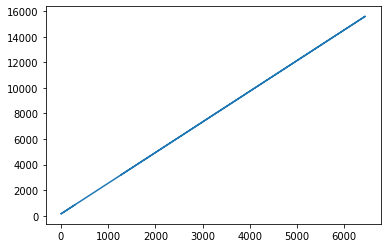

In [ ]:
plt.plot(data["total_bedrooms"], np.polyval(reg, data["total_bedrooms"]))

## La forma no tan pesada

En el caso anterior, cuesta bastante más trabajar con regresiones multivariadas (para regresiones lineales, hay que usar el paquete linalg dentro de Numpy).

Para regresiones lineales multivariadas simples, podemos trabajar directamente con Scikit-Learn!

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data.loc[:, ["total_bedrooms", "total_rooms"]], data["population"])
lin_reg.predict(np.array([[10000, 40000]]))

array([22836.34940399])

In [ ]:
# Otra cosa interesante del modelo que creamos es que podemos revisar todos sus atributos
print(lin_reg.intercept_)
print(lin_reg.coef_)

### Para más información (incluida regresión polinomial en SKLearn y StatsModels), se puede leer: https://realpython.com/linear-regression-in-python/

126.56654344473691
[1.62888989 0.1605221 ]


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('population ~ total_bedrooms + total_rooms', data=data).fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             population   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 3.183e+04
Date:                Tue, 30 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:38:52   Log-Likelihood:            -1.3066e+05
No. Observations:               17000   AIC:                         2.613e+05
Df Residuals:                   16997   BIC:                         2.614e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        126.5665      6.569     19.267      0.000     113.690     139.443
total_bedrooms     1.6289      0.026     63.124      0.000       1.578       1.679
total_rooms        0.1605      0.005     32.172      0.000       0.151       0.170
==============================================================================
Omnibus:                    22826.385   Durbin-Watson:                   1.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         53625896.069
Skew:                           6.771   Prob(JB):                         0.00
Kurtosis:                     277.816   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Clasificación

Veamos dos formas de hacer clasificación: Regresión Logística y Árboles de Decisión.

## Regresión Logística

Nuevamente vamos a usar SKLearn, la forma más sencilla de hacer andar esto.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [ ]:
# Primero revisemos con qué estamos trabajando...
data["median_house_value"].describe()

count     17000.000000
mean     207300.912353
std      115983.764387
min       14999.000000
25%      119400.000000
50%      180400.000000
75%      265000.000000
max      500001.000000
Name: median_house_value, dtype: float64

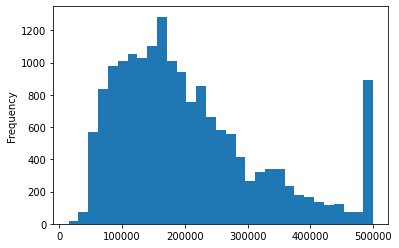

In [ ]:
# Armemos un clasificador que nos diga si el valor mediano de la casa es mayor a USD180.000
# Hay que etiquetar nuestro valor objetivo.
data["median_house_value"].plot.hist(bins=31)

In [ ]:
data["target"] = (data["median_house_value"] > 180000).astype(int)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(data.iloc[:, :-2], data.iloc[:, -1]) # Qué hice mal acá?

# Cargamos nuestro set de test y vemos rápido cómo nos fue.
data_test = pd.read_csv("sample_data/california_housing_test.csv")
data_test["pred"] = log_reg.predict(data_test.iloc[:, :-1])
data_test["true"] = (data_test["median_house_value"] > 180000).astype(int)

(data_test["pred"] == data_test["true"]).sum() / len(data_test)

0.807

In [ ]:
data_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,pred,true
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0,1,1
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0,1,0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0,1,1
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0,1,1
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0,0,0


## Árboles de Decisión

Veamos cómo hacerlos con SKLearn, con DecisionTree.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [ ]:
# Importemos el clasificador

from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0)
dec_tree.fit(data.iloc[:, :-2], data.iloc[:, -1])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(200.88000000000002, 181.2, 'X[7] <= 4.071\ngini = 0.5\nsamples = 17000\nvalue = [8489, 8511]'),
 Text(133.92000000000002, 108.72, 'X[7] <= 2.84\ngini = 0.425\nsamples = 10622\nvalue = [7363, 3259]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.288\nsamples = 5444\nvalue = [4495, 949]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.494\nsamples = 5178\nvalue = [2868, 2310]'),
 Text(267.84000000000003, 108.72, 'gini = 0.291\nsamples = 6378\nvalue = [1126, 5252]')]

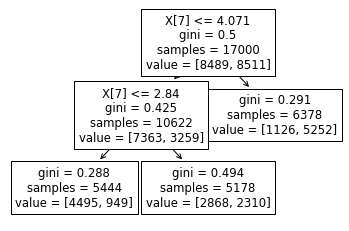

In [ ]:
# Podemos dibujar el árbol bastante fácil con tree

from sklearn import tree
tree.plot_tree(dec_tree)

In [ ]:
# Evaluamos nuestro modelo y vemos a cuántos les pegamos

data_test["pred_tree"] = dec_tree.predict(data_test.iloc[:, :-3])
(data_test["pred_tree"] == data_test["true"]).sum() / len(data_test)

0.74

Si queremos aprender un poco más cómo recorrer diferentes ramas y tener más info todavía, podemos visitar: https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

## Evaluar performance de los algoritmos

Obviamente todo esto es bastante simple, pero en clasificación queremos trabajar con las matrices de confusión.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(data_test["true"], data_test["pred"]))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1524
           1       0.82      0.78      0.80      1476

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000



# Algo de Multivariado

Hay bastante para hacer, pongamos PCA y Clustering?

## PCA

Para hacer análisis de componentes principales, de nuevo podemos recurrir tranquilamente a SKLearn!

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,target
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,0


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data.iloc[:, :-2])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Vectores
print(pca.components_)

# Valores singulares
print(pca.singular_values_)

[[ 4.87779818e-05 -4.83304787e-05 -1.81139134e-03  8.78741371e-01
   1.61685692e-01  4.24259252e-01  1.47214563e-01  1.17264926e-04]
 [ 4.26597318e-04 -5.92830386e-04  1.66615756e-03 -4.53645869e-01
   5.45364032e-02  8.83742060e-01  1.01124591e-01 -1.29843611e-03]]
[321417.69969839  69595.09965136]


In [ ]:
# Transformamos y graficamos!
transformed = pca.transform(data.iloc[:, :-2])
px.scatter(data_frame=data, x=transformed[:, 0], y=transformed[:, 1], color=data["target"], template="simple_white")

## Clustering con K-Means

K-Means nuevamente aparece en SKLearn, veamos cómo usarlo

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# Vamos a importar y aplicar sobre nuestros datos transformados, para visualizar un poco.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(data.iloc[:, :-2])

# Dibujemos los puntos con los clusters a los cuales pertenecen.
px.scatter(data_frame=data, x=transformed[:, 0], y=transformed[:, 1], color=kmeans.labels_, template="simple_white")